# Single point modeling of CLMU
Junjie Yu, 2023-12-06, Manchester, UK

ENV: RL_urban; docker container: clmu; docker image: clmu-app:1 

## 1 Get the shell script for running CESM/CLM

simulation location : New York City

New York City coordinates can be replaced with other city coordinates

40°42′46″N 74°00′22″W from https://en.wikipedia.org/wiki/New_York_City

New York City = {'lat': 40.42, 'lon': -74.00}

In [1]:
from utils.cesm import *

print(now_time())

CASESCRIPT = "/p/project/clm5.0/cime/scripts"
CASESCRIPT_local = "/home/zhonghua/p/project/clm5.0/cime/scripts"
CASEROOT_local = "/home/zhonghua/p/scratch/CESMDATAROOT/CaseOutputs"
DOUT_S_ROOT = "/home/zhonghua/p/scratch/CESMDATAROOT/Archive"

scriptpath = "./scr/PTS_SSP370.sh"
configpath = "config_SSP370.json"


cesm = cesm_run(CASESCRIPT, CASESCRIPT_local, CASEROOT_local, DOUT_S_ROOT, configpath)
#CASESCRIPT, the path of the CESM2/CTSM scripts folder
#    e.g., CASESCRIPT = "/p/project/myclm/cime/scripts"
#CASESCRIPT_local, the path of the CESM2/CTSM scripts folder in the local machine
#    e.g., CASESCRIPT_local = "/home/zhonghua/p/project/clm5.0/cime/scripts"
#CASEROOT_local, the path of the CESM2/CTSM case folder in the local machine
#    e.g., CASEROOT_local = "/home/zhonghua/p/scratch/CESMDATAROOT/CaseOutputs"
#DOUT_S_ROOT, the path of the CESM2/CTSM output folder
#    e.g., DOUT_S_ROOT = "/p/scratch/CESMDATAROOT/Archive"
#JSONPATH, the path of the json file or the json file
#    e.g., JSONPATH = "config.json"
#    e.g., JSONPATH = {"case_lat": 0.9, 
#                        "case_lon": 1.25, 
#                        "case_name": "test", 
#                        "fsurdat": "/p/project/myclm/cime/scripts/f19_g16.B1850.f19_g16.c090918.clm2.r.0.5x0.5_20090202.nc"}


# password = "***"
password = input("Password of server: ")

# reset case
# if your server need password to run sudo command, you need to add "sudo -S" before the command and add the password
cesm.reset_case(password=password)

# change the permission of the script
command_0 = "sudo -S docker exec myclm chmod +x /p/pyscripts/PTS_SSP370.sh"
run_command(command_0, password)

# run the script
with open("/home/zhonghua/p/pyscripts/PTS_SSP370.sh", "w") as f:
    f.write(cesm.create_case(scriptpath))
command = "sudo -S docker exec myclm sh -c '/p/pyscripts/PTS_SSP370.sh' "
run_command(command, password)

d0 = cesm.nc_view()

Current time: 2023-12-09 16:26:05



[sudo] password for zhonghua: [sudo] password for zhonghua: 

## 2 Modify the data

In [3]:
cesm.config['case_start_year'] = "2055"
cesm.config['case_start_year'] = "2055"
with open("/home/zhonghua/p/pyscripts/PTS_SSP370.sh", "w") as f:
    f.write(cesm.create_case(scriptpath))
run_command(command, password)
d2055= cesm.nc_view()

In [4]:
d2055

<xarray.Dataset>
Dimensions:             (levgrnd: 25, levlak: 10, levdcmp: 1, time: 3,
                         hist_interval: 2, lon: 1, lat: 1, column: 14,
                         gridcell: 1, landunit: 5, pft: 28)
Coordinates:
  * levgrnd             (levgrnd) float32 0.01 0.04 0.09 ... 19.48 28.87 42.0
  * levlak              (levlak) float32 0.05 0.6 2.1 4.6 ... 25.6 34.33 44.78
  * levdcmp             (levdcmp) float32 1.0
  * time                (time) object 2055-07-01 00:00:00 ... 2055-09-01 00:0...
  * lon                 (lon) float32 286.2
  * lat                 (lat) float32 40.05
Dimensions without coordinates: hist_interval, column, gridcell, landunit, pft
Data variables: (12/54)
    mcdate              (time) int32 ...
    mcsec               (time) int32 ...
    mdcur               (time) int32 ...
    mscur               (time) int32 ...
    nstep               (time) int32 ...
    time_bounds         (time, hist_interval) object ...
    ...                  ...
    pfts1d_itype_veg    (pft) int32 ...
    pfts1d_itype_col    (pft) int32 ...
    pfts1d_itype_lunit  (pft) int32 ...
    pfts1d_active       (pft) int32 ...
    TREFMNAV            (time, landunit) float32 ...
    TREFMXAV            (time, landunit) float32 ...
Attributes: (12/38)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 12/09/23 16:28:13
    source:                                    Community Land Model CLM4.0
    hostname:                                  clm5-docker
    ...                                        ...
    ctype_urban_shadewall:                     73
    ctype_urban_impervious_road:               74
    ctype_urban_pervious_road:                 75
    cft_c3_crop:                               1
    cft_c3_irrigated:                          2
    time_period_freq:                          month_1

## 3 View the results

Current time: 2023-12-09 16:29:16



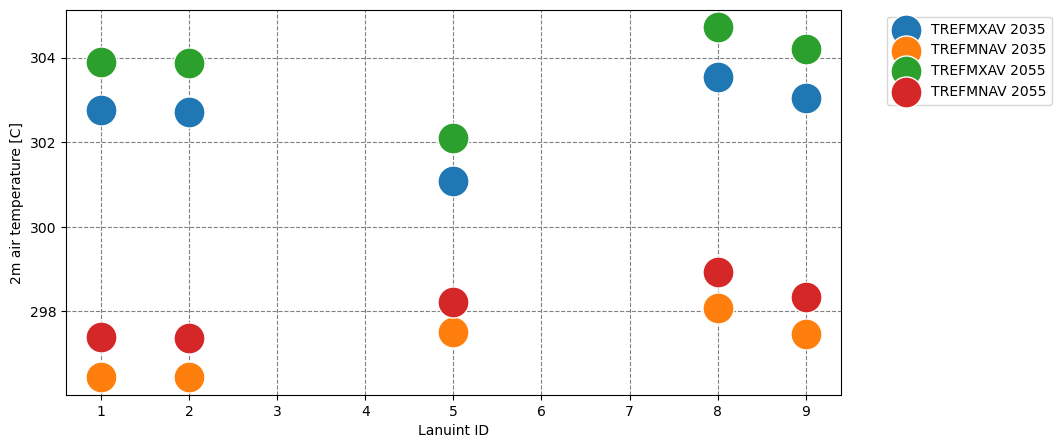

In [6]:
import matplotlib.pyplot as plt

print(now_time())
fig, ax = plt.subplots(1, 1, figsize=(10, 5))


d0['TREFMXAV'].assign_coords({'landunit': d0['land1d_ityplunit'].values}).mean(dim='time').plot.scatter(s=500, ax=ax, label="TREFMXAV 2035")
d0['TREFMNAV'].assign_coords({'landunit': d0['land1d_ityplunit'].values}).mean(dim='time').plot.scatter(s=500, ax=ax, label="TREFMNAV 2035")

d2055['TREFMXAV'].assign_coords({'landunit': d0['land1d_ityplunit'].values}).mean(dim='time').plot.scatter(s=500, ax=ax, label="TREFMXAV 2055")
d2055['TREFMNAV'].assign_coords({'landunit': d0['land1d_ityplunit'].values}).mean(dim='time').plot.scatter(s=500, ax=ax, label="TREFMNAV 2055")
ax.set_xlabel('Lanuint ID')
ax.set_ylabel('2m air temperature [C]')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Add grid lines
ax.grid(color='gray', linestyle='dashed')

# Set grid lines to align with x-axis ticks
ax.set_axisbelow(True)

plt.show()